In [1]:
import pandas as ad
import os 
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt


In [2]:
def get_2ddataset(paths):
    
    df = ad.read_csv("annotations.csv")
    j = 1
    for path in paths:
        for  file in os.listdir(path):
            if file.endswith(".mhd"):
                if file[:-4] in df["seriesuid"].tolist():
                    image = sitk.ReadImage(os.path.join(path, file))
                    mask = sitk.ReadImage(os.path.join("D:/fin_de_etude/data/seg-lungs-LUNA16", file))
                    df_2 = df[df["seriesuid"] == file[:-4]]
                    i = 1
                    for index in df_2.index:
                        x, y, z, d = df_2["coordX"][index], df_2["coordY"][index], df_2["coordZ"][index], df_2["diameter_mm"][index]
                        print(x, y, z, d)
                        point = (x, y, z) #  coordinates qui existe dans le fichier annotation
                        point_idx = image.TransformPhysicalPointToContinuousIndex(point) # transformer les coordinnaies de les données physique real a mond reél à des donnees presentable dans l'image
                        pixel_size = image.GetSpacing()[0]
                        
                        image_diameter = d /pixel_size
                        df["seriesuid"][index] = f"image{j}_nodule{i}"
                        df["coordX"][index] = point_idx[0]
                        df["coordY"][index] = point_idx[1]
                        df["diameter_mm"][index] = image_diameter
                        print(point_idx, image_diameter)
                        array_3d = sitk.GetArrayFromImage(image)
                        mask_3d = sitk.GetArrayFromImage(mask)
                        arr_2d = array_3d[int(point_idx[2])]
                        mask_2d = mask_3d[int(point_idx[2])]
                        np.save(os.path.join("D:/fin_de_etude/data/dataset_2d", f"image{j}_nodule{i}.npy"), arr_2d)
                        np.save(os.path.join("D:/fin_de_etude/data/masks", f"mask{j}_nodule{i}.npy"), mask_2d)
                        i+=1
                else:
                    image = sitk.ReadImage(os.path.join(path, file))
                    array_3d = sitk.GetArrayFromImage(image)
                    
                    mask = sitk.ReadImage(os.path.join("D:/fin_de_etude/data/seg-lungs-LUNA16", file))
                    mask_3d = sitk.GetArrayFromImage(mask)
                    mask_2d = mask_3d[mask_3d.shape[0] // 2]
                    arr_2d = array_3d[array_3d.shape[0] // 2]
                    np.save(os.path.join("D:/fin_de_etude/data/dataset_2d", f"image{j}.npy"), arr_2d)
                    np.save(os.path.join("D:/fin_de_etude/data/masks", f"mask{j}.npy"), mask_2d)
                j+=1
    df = df.drop('coordZ', axis=1)
    df.to_csv("annotation_2.csv")


In [3]:
paths = ["D:/fin_de_etude/data/subset0","D:/fin_de_etude/data/subset1","D:/fin_de_etude/data/subset2","D:/fin_de_etude/data/subset3","D:/fin_de_etude/data/subset4","D:/fin_de_etude/data/subset5"]
get_2ddataset(paths)

-100.5679445 67.26051683 -231.816619 6.440878725
(110.39259332811388, 346.62447366274836, 32.7733524) 8.678231022345406


C:\Users\gamer\AppData\Local\Temp\ipykernel_20868\2351765739.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seriesuid"][index] = f"image{j}_nodule{i}"
C:\Users\gamer\AppData\Local\Temp\ipykernel_20868\2351765739.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coordX"][index] = point_idx[0]
C:\Users\gamer\AppData\Local\Temp\ipykernel_20868\2351765739.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["coordY"][in

46.18853869 48.40280596 -108.5786324 13.59647134
(426.1599867758768, 285.52261784497364, 68.33709408) 24.773647110830687
36.39204443 76.77166265 -123.3219112 4.343199739
(408.31014282360627, 337.21250318369334, 56.54247104) 7.913589855427735
136.4340587 117.7655789 -181.9478171 4.681381581
(427.16141273406777, 351.4818254152828, 186.92348303999998) 6.307541656696942


KeyboardInterrupt: 

In [4]:
df = ad.read_csv("annotations.csv"
                 )
df_2 = df[df["seriesuid"]=="1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860"]

In [5]:
df_2["coordX"][1]

103.7836509

In [6]:
lis = os.listdir("D:/fin_de_etude/data/masks")
print(len(lis))

892


27.6263834112


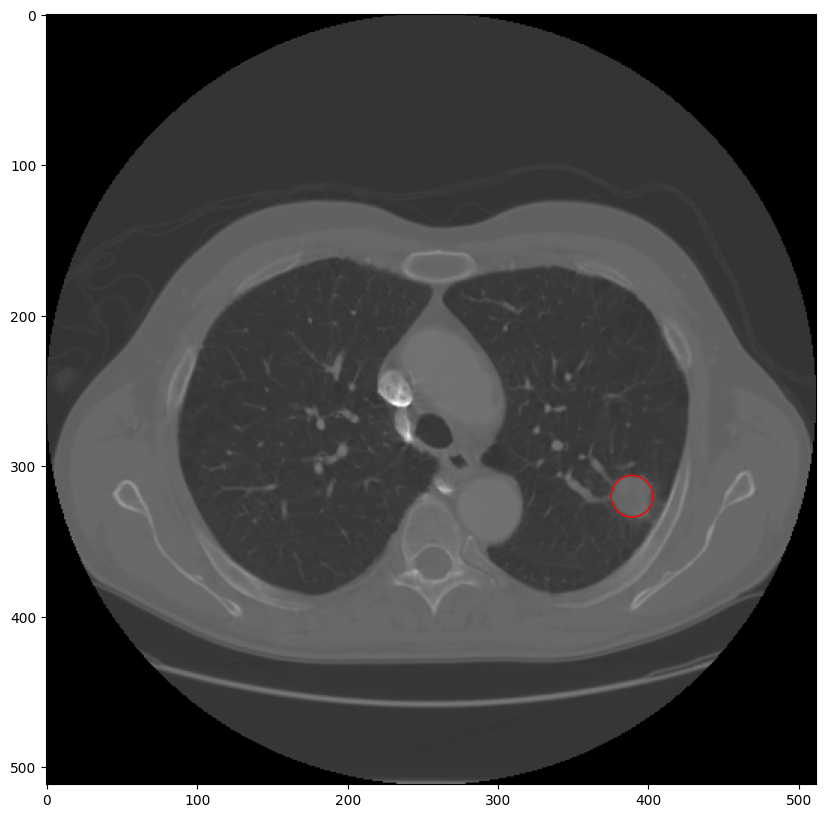

In [7]:
from skimage.draw import circle_perimeter

img = np.load("D:/fin_de_etude/data/dataset_2d/image87_nodule1.npy")
df = ad.read_csv("annotation_2.csv")
file = df[df["seriesuid"]=="image87_nodule1"]
x,y,d = float(file["coordX"]),float(file["coordY"]), float(file["diameter_mm"])
print(d)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap="gray")
circle = plt.Circle((int(x),int(y)) , radius=(d/2), color='red', fill=False)
plt.gcf().gca().add_artist(circle)


In [10]:

plt.imsave("imge.png",img)

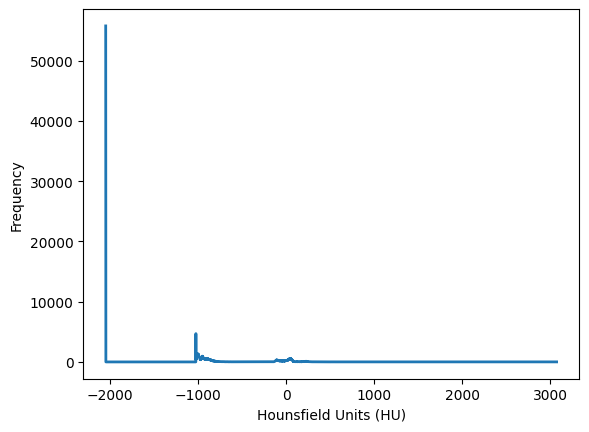

In [7]:
from skimage import data,  img_as_float
from skimage.exposure import histogram


hist, hist_centers  = histogram(img)

plt.plot(hist_centers, hist, lw=2)
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

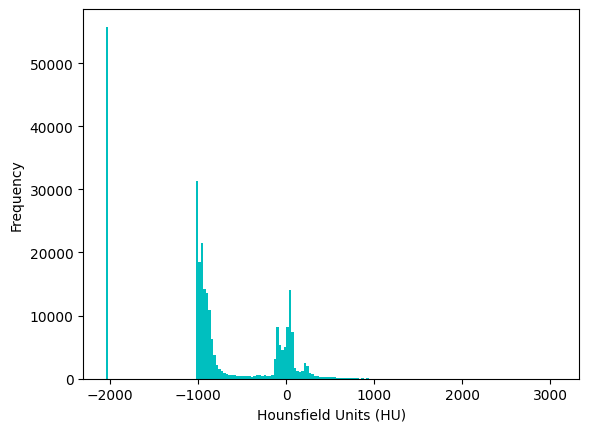

In [8]:
plt.hist(img.flatten(), bins=180, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

-2048


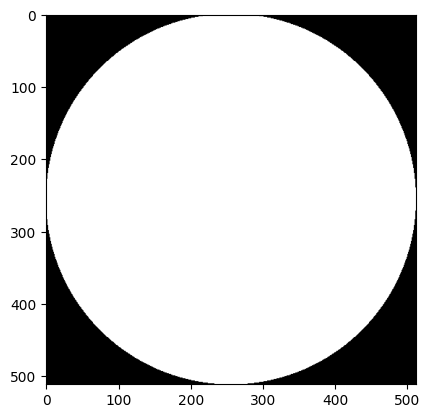

In [10]:
from skimage.filters import threshold_otsu
from skimage.filters import thresholding
t = threshold_otsu(img)
print(t)
mask = img>t
plt.imshow(mask,cmap="gray")

In [37]:

img = img*mask

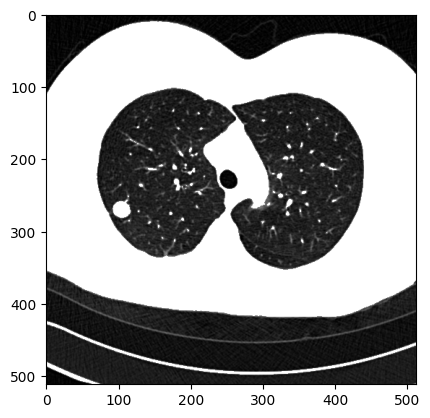

In [38]:
plt.imshow(img,cmap="gray")

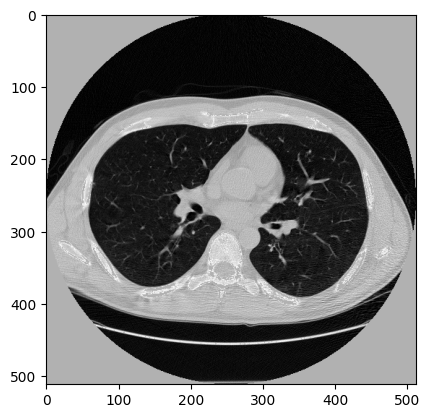

In [154]:
mask = np.where(img<450,1,0)
img = img*mask
plt.imshow(img,cmap="gray")

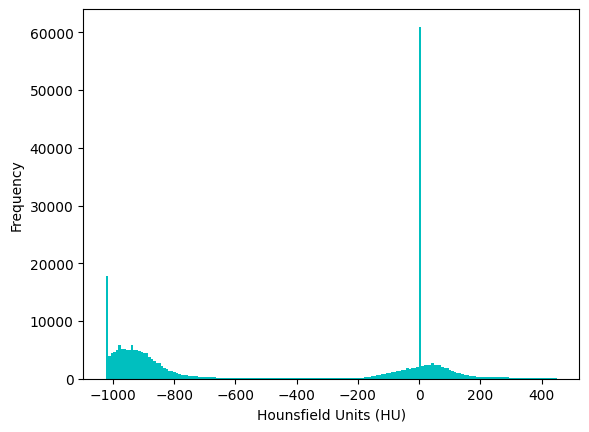

In [155]:
plt.hist(img.flatten(), bins=180, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

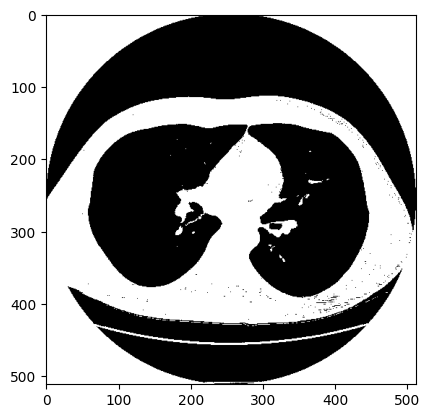

In [161]:
mask = np.where(img<-200,0,1)
img = img*mask
plt.imshow(img,cmap="gray")
plt.imshow(mask,cmap="gray")

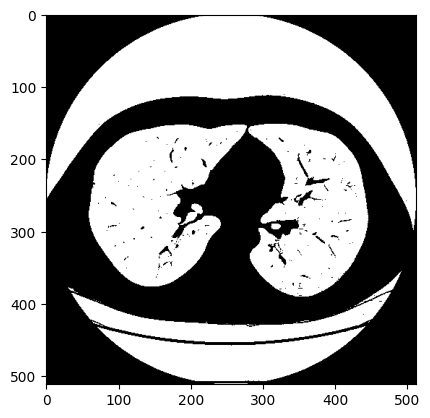

In [157]:
from skimage.filters import threshold_otsu
from skimage.filters import thresholding
t = threshold_otsu(img)
mask = np.where(img > -604,0,1)
plt.imshow(mask,cmap="gray")

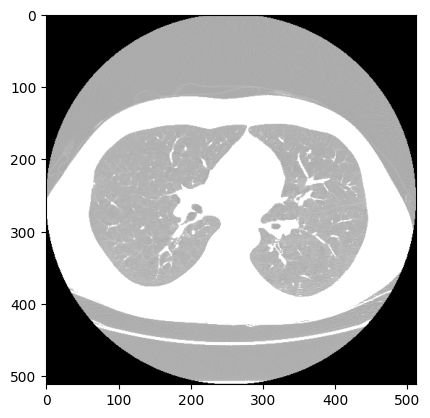

In [117]:
img = img*mask
plt.imshow(img,cmap="gray")


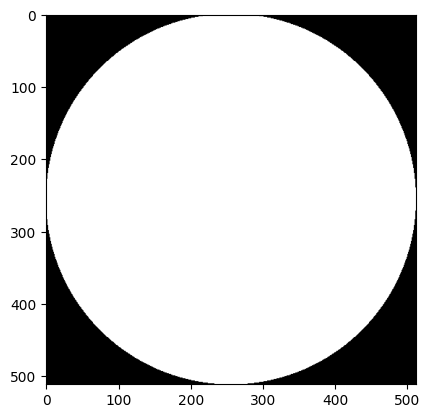

In [118]:
t = threshold_otsu(img)
mask = img > t
plt.imshow(mask,cmap="gray")

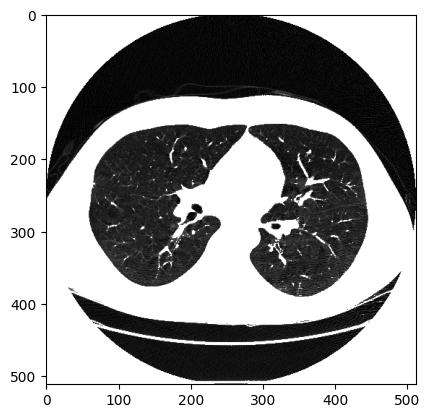

In [119]:
img = img*mask
plt.imshow(img,cmap="gray")

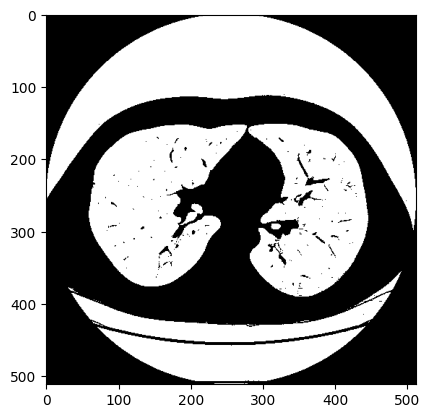

In [120]:
t = threshold_otsu(img)
mask = img < t
plt.imshow(mask,cmap="gray")

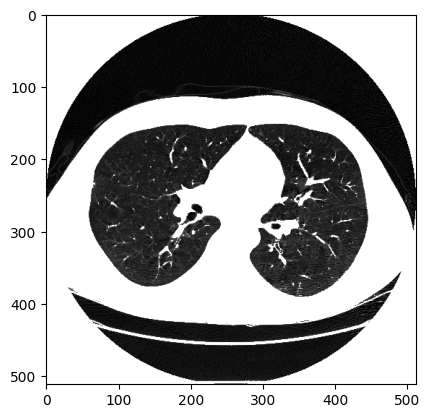

In [121]:
img = img*mask
plt.imshow(img,cmap="gray")

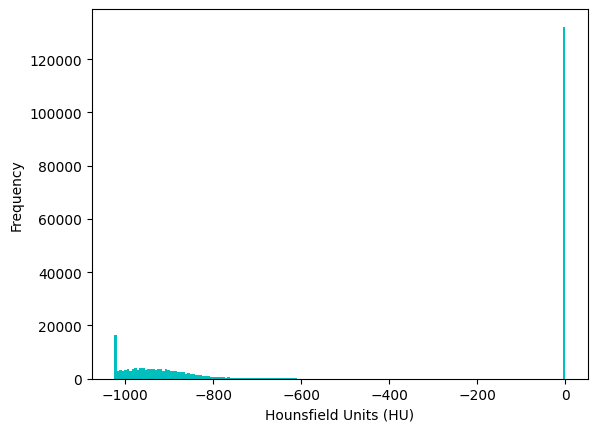

In [122]:
plt.hist(img.flatten(), bins=180, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

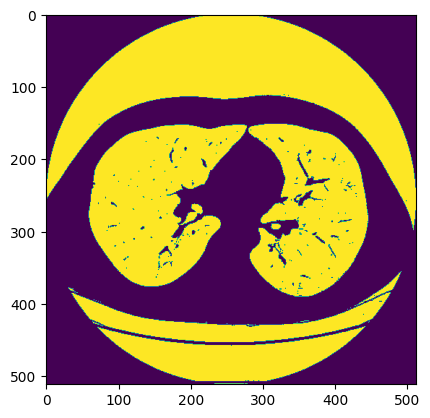

In [123]:
t = threshold_otsu(img)
mask = img < t
plt.imshow(mask)

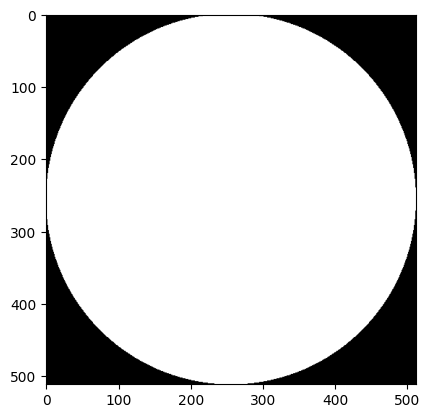

In [55]:
plt.imshow(img,cmap="gray")